<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv7-asierra-r/blob/main/BlindSample_ASierraR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de un blind sample. Prácticas Profesionales Otoño 2023**

Angélica Sierra Romero

Para este ejercicio, nos interesa descubrir qué hay en este dataset. Primero, importo algunas librerías que me han sido útiles para el análisis pasado y genero una liga para importar el archivo csv del dataset con pandas.

In [2]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#matplotlib para hacer los gráficos necesarios
import matplotlib.pyplot as plt

In [3]:
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://raw.githubusercontent.com/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv7-asierra-r/main/Sample7.csv',delimiter=',')
particles.head(10)

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,45.4315,1.4706,-1.1630,1,EB,0.0008,0.0000,0.0000,1.0190,0.0000
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,60.5754,-0.4896,1.0496,-1,EB,0.0112,0.0000,0.7185,1.8461,0.0000
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,45.2954,-2.0401,3.1187,1,EE,0.0260,0.0280,15.2170,4.5337,3.8370
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,45.9013,1.1561,2.4786,-1,EB,0.0086,0.0000,0.0000,2.4388,0.5676
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,34.8931,-2.2444,0.6106,-1,EE,0.0290,0.0000,12.4229,0.4534,0.9096
5,163286,109260503,41.9583,-0.4056,-2.7564,1,EB,0.0126,0.0164,29.7964,...,36.7997,-2.3813,0.0790,1,EE,0.0315,0.0289,0.0000,4.9119,5.5508
6,163286,109491381,62.3848,1.0751,-1.7610,-1,EB,0.0083,0.0000,0.0000,...,43.4772,1.5828,1.4717,1,EE,0.0108,0.0195,15.3751,2.8608,3.1914
7,163286,109508443,25.1316,-2.1099,-1.8266,1,EE,0.0249,0.0000,0.0000,...,38.0420,0.3717,-0.8307,1,EB,0.0127,0.1062,8.5834,2.9123,0.0000
8,163286,110268001,32.3642,-0.5340,-2.6718,-1,EB,0.0109,0.0843,4.7355,...,40.6404,1.3910,0.0744,1,EB,0.0180,0.0000,12.4254,4.1619,7.4554
9,163286,110085994,31.4123,-0.2164,1.2954,-1,EB,0.0118,0.1096,18.8325,...,42.4105,-1.2758,-2.1235,-1,EB,0.0087,0.0000,20.4377,6.4224,2.4006


Para ver el nombre de todos los headers:

In [ ]:
list(particles.columns)

En el dataset, se tienen los siguientes parámetros para cada evento:

1. pt: The transverse momentum of the lepton (in units of GeV), either a muon or an electron.
2. eta: The pseudorapidity of the lepton, either a muon or an electron.
3. phi: The phi angle (in radians) of the lepton, either a muon or an electron.
4. Q: The charge of the lepton, either a muon or an electron.
5. type: For an electron, either EB or EE: whether the electron is in the barrel or in the endcap.
6. sigmaEtaEta: The weighted cluster rms along eta for an electron.
7. HoverE: The energy of the electron in the HCAL divided by the energy of the electron in the ECAL.
8. isoTrack: The isolation variable for the electron in the tracker.
9. isoEcal: The isolation variable for the electron in the ECAL.
10. isoHcal: The isolation variable for the electron in the HCAL.

Primero, podría interesarnos ver la masa invariante de cada evento usando la fórmula definida para el primer dataset:

In [5]:
#función para reconstruir la masa invariante de las dos partículas
def mtransversa(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

Luego, definimos una función para calcular el momento transversal del candidato a boson Z como la suma vectorial del momento transversal de los dos electrones en cada evento:

In [6]:
#función para calcular el pT del Z
def zmomentum(pt1,phi1,pt2,phi2):
  return np.sqrt((pt1*np.cos(phi1)+pt2*np.cos(phi2))**2+(pt1*np.sin(phi1)+pt2*np.sin(phi2))**2)

Usamos los nombres de las columnas del dataset como parámetros de ambas funciones. Es importante notar que las funciones se definen con numpy para poder hacer las operaciones indicadas en el dataset.

In [7]:
#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa transversa.
mtransv=mtransversa(particles['pt1'],particles['pt2'],particles['eta1'],particles['eta2'],particles['phi1'],particles['phi2'])

In [8]:
#Y para la que calcula el momento transversal del z
zpt=zmomentum(particles['pt1'],particles['phi1'],particles['pt2'],particles['phi2'])

Redefinimos el dataset agregando dos columnas: la de masa invariante y de momento transversal del candidato a bosón Z:

In [9]:
particles=pd.concat((particles, mtransv.rename('mt'), zpt.rename('zpt')), axis=1)
particles.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,mt,zpt
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000,89.590677,8.437928
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000,92.252203,33.777315
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370,67.859050,54.158428
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676,87.604679,7.480388
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096,101.424147,7.132655


Para obtener un survey estadístico rápido de las variables del dataset, empleamos describe:

In [10]:
particles.describe()

,Run,Event,pt1,eta1,phi1,Q1,sigmaEtaEta1,HoverE1,isoTrack1,isoEcal1,...,eta2,phi2,Q2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,mt,zpt
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168781.047800,2.968640e+08,39.820004,-0.004236,-0.011530,0.019600,0.012418,0.023591,5.809642,4.678145,...,0.008657,0.028482,-0.007400,0.014082,0.020239,5.291606,4.303183,2.152813,88.891413,18.589741
std,3208.975943,2.061318e+08,11.598636,1.207731,1.818831,0.999858,0.005824,0.041234,9.850592,4.885182,...,1.437133,1.813896,1.000023,0.007175,0.037990,9.414047,4.732648,3.236533,12.125822,19.176213
min,160873.000000,8.348700e+04,25.003000,-2.574400,-3.141600,-1.000000,0.000700,0.000000,0.000000,0.000000,...,-2.628800,-3.140200,-1.000000,0.000300,0.000000,0.000000,0.000000,0.000000,60.001986,0.032623
25%,166782.000000,1.609777e+08,31.717950,-0.926350,-1.620950,-1.000000,0.008800,0.000000,0.000000,1.689325,...,-1.199375,-1.517400,-1.000000,0.008900,0.000000,0.000000,1.464525,0.000000,82.804464,6.657412
50%,167830.000000,2.679818e+08,38.391050,0.005850,-0.045600,1.000000,0.009900,0.000000,0.871650,2.814550,...,0.020000,0.029750,-1.000000,0.011000,0.000000,0.000000,2.588200,0.900200,89.864602,12.901140
75%,172163.000000,3.782592e+08,44.978400,0.916500,1.565775,1.000000,0.013700,0.033400,8.954225,6.201650,...,1.221450,1.580850,1.000000,0.017700,0.026800,7.702075,5.492700,2.905850,94.016654,23.663068
max,173663.000000,1.060311e+09,252.099000,2.618900,3.141200,1.000000,0.061300,1.141200,336.262000,79.642100,...,2.604700,3.141400,1.000000,0.073100,1.274000,205.613000,74.739500,72.493000,119.967439,266.398239


Una vez que tenemos este dataset, podemos generar los gráficos respectivos y previo a la introducción de cortes:

In [ ]:
#Sabemos que la masa va de 60 a 120 GeV y queremos que esté en intervalos de 5 GeV (120-60)/5 + 1 = 13
bins = np.linspace(60, 120, 13)

ax = plt.gca()
ax.set_title("Masa Invariante")
plt.hist(particles['mt'], bins, histtype='step', color='black')
plt.xlabel("$\mathregular{M_{T}}$ [GeV]", fontweight='normal', fontsize=14)
plt.ylabel("Eventos / 5 GeV", fontweight='normal', fontsize=14)
#ax.set_yscale("log")
plt.show()

In [ ]:
bins = np.linspace(0, 150, 31)

ax = plt.gca()
ax.set_title("Momento transversal del candidato a Z")
plt.hist(particles['zpt'], bins, histtype='step', color='black')
plt.xlabel("$\mathregular{p_T^Z}$ [GeV]", fontweight='normal', fontsize=14)
plt.ylabel("Eventos / 5 GeV", fontweight='normal', fontsize=14)
#ax.set_yscale("log")
plt.show()

In [ ]:
#El mínimo del momento transversal es 20, podemos cambiar el código fácilmente para generar el histograma del momento transversal 2
bins = np.linspace(20, 120, 21)

ax = plt.gca()
ax.set_title("Momento Transversal 1")
plt.hist(particles['pt1'], bins, histtype='step', color='black')
plt.xlabel("$\mathregular{p_{T_1}}$ [GeV]", fontweight='normal', fontsize=14)
plt.ylabel("Eventos / 5 GeV", fontweight='normal', fontsize=14)
#ax.set_yscale("log")
plt.show()

In [ ]:
#Podemos cambiar el código fácilmente para generar el histograma de la pseudorapidez 2
bins = np.linspace(-2.7, 2.7, 28)

ax = plt.gca()
ax.set_title("Pseudorapidez 1")
plt.hist(particles['eta1'], bins, histtype='step', color='black')
plt.xlabel("$\mathregular{\eta_1}$", fontweight='normal', fontsize=14)
plt.ylabel("Eventos / 0.2", fontweight='normal', fontsize=14)
#ax.set_yscale("log")
plt.show()

In [ ]:
#Podemos cambiar el código fácilmente para generar el histograma del ángulo azimutal 2
bins = np.linspace(-3.2, 3.2, 33)

ax = plt.gca()
ax.set_title("Ángulo azimutal 1")
plt.hist(particles['phi1'], bins, histtype='step', color='black')
plt.xlabel("$\mathregular{\phi_1}$ [rad]", fontweight='normal', fontsize=14)
plt.ylabel("Eventos / 0.2 rad", fontweight='normal', fontsize=14)
#ax.set_yscale("log")
plt.show()

Además, podemos generar gráficos de dispersión para estudiar el comportamiento conjunto de diversas variables. Las relaciones más importantes en este sentido serán entre variables del mismo tipo para ambos electrones, o bien, entre el momento transversal y la pseudorapidez. Esto último es relevante por la diferencia en la cantidad de material atravesado y la subsecuente pérdida de energía de acuerdo con la pseudorapidez.

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.set_title("$\mathregular{\eta_1}$ contra $\mathregular{\eta_2}$")
#Se propone un mapa de color según la masa
plt.scatter(particles['eta1'], particles['eta2'], s=2, c=particles['mt'], cmap='coolwarm')
plt.xlabel('$\mathregular{\eta_1}$', fontweight='normal', fontsize=14)
plt.ylabel('$\mathregular{\eta_2}$', fontweight='normal', fontsize=14)
plt.colorbar(label = '$\mathregular{M_T}$ [GeV]')
#Se proponen líneas que delimiten las zonas cubiertas por los endcaps y el barrel del ECal, pues la unión es una zona de baja eficiencia
#plt.axvline(x=1.525, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#plt.axvline(x=-1.525, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#plt.axhline(y=1.525, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#plt.axhline(y=-1.525, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#ax.set_xscale("log")
#ax.set_yscale("log")
plt.show()

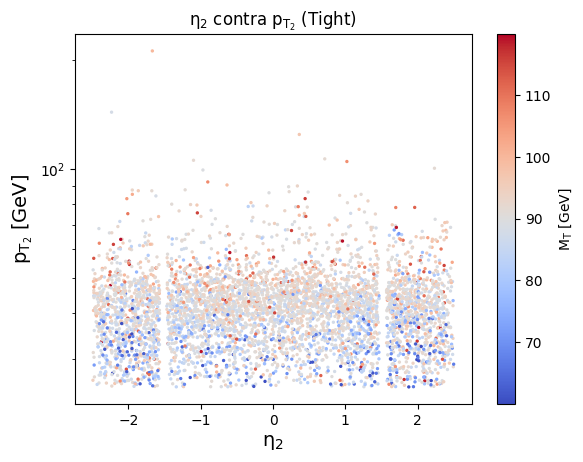

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.set_title("$\mathregular{\eta_2}$ contra $\mathregular{p_{T_2}}$ (Tight)")
plt.scatter(particlesT['eta2'], particlesT['pt2'], s=2, c=particlesT['mt'], cmap='coolwarm')
plt.xlabel('$\mathregular{\eta_2}$', fontweight='normal', fontsize=14)
plt.ylabel('$\mathregular{p_{T_2}}$ [GeV]', fontweight='normal', fontsize=14)
plt.colorbar(label = '$\mathregular{M_T}$ [GeV]')
#plt.axvline(x=0.9, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#plt.axvline(x=-0.9, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#plt.axhline(y=1.04, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#plt.axhline(y=-1.04, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value1')
#ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

In [ ]:
particles_cut=particles[(particles.pt1>20)&(particles.pt2>20)&(np.absolute(particles.eta1)<2.5)&(np.absolute(particles.eta2)<2.5)]
len(particles_cut)

9847

In [ ]:
particles_cut2=particles_cut[(np.absolute(particles_cut.eta1)<1.47)|(np.absolute(particles_cut.eta1)>1.57)]
len(particles_cut2)

9703

In [ ]:
particles_cut3=particles_cut2[(np.absolute(particles_cut2.eta2)<1.47)|(np.absolute(particles_cut2.eta2)>1.57)]
len(particles_cut3)

9529

In [ ]:
particles_c=particles_cut3[(particles_cut3.Q1+particles_cut3.Q2==0)]
len(particles_c)

7231

In [ ]:
#Ahora voy a hacer subdatasets que contengan info de los
#candidatos a electrones detectados en el EB o el EE
particlesB=particles_c[(particles_c.type1=="EB")]
particlesE=particles_c[(particles_c.type1=="EE")]

In [ ]:
particlesBB=particlesB[(particlesB.type2=="EB")]
particlesBE=particlesB[(particlesB.type2=="EE")]
particlesEB=particlesE[(particlesE.type2=="EB")]
particlesEE=particlesE[(particlesE.type2=="EE")]

In [ ]:
particlesL=particles_c[(particles_c.HoverE1<0.09)&(particles_c.HoverE2<0.09)]

In [ ]:
particlesBB_M=particlesBB[(particlesBB.HoverE1<0.06)&(particlesBB.HoverE2<0.06)&(particlesBB.sigmaEtaEta1>0.005)&(particlesBB.sigmaEtaEta1<0.011)&(particlesBB.sigmaEtaEta2>0.005)&(particlesBB.sigmaEtaEta2<0.011)]
particlesBE_M=particlesBE[(particlesBE.HoverE1<0.06)&(particlesBE.HoverE2<0.1)&(particlesBE.sigmaEtaEta1>0.005)&(particlesBE.sigmaEtaEta1<0.011)&(particlesBE.sigmaEtaEta2>0.008)&(particlesBE.sigmaEtaEta2<0.022)]
particlesEB_M=particlesEB[(particlesEB.HoverE1<0.1)&(particlesEB.HoverE2<0.06)&(particlesEB.sigmaEtaEta1>0.008)&(particlesEB.sigmaEtaEta1<0.022)&(particlesEB.sigmaEtaEta2>0.005)&(particlesEB.sigmaEtaEta2<0.011)]
particlesEE_M=particlesEE[(particlesEE.HoverE1<0.1)&(particlesEE.HoverE2<0.1)&(particlesEE.sigmaEtaEta1>0.008)&(particlesEE.sigmaEtaEta1<0.022)&(particlesEE.sigmaEtaEta2>0.008)&(particlesEE.sigmaEtaEta2<0.022)]

In [ ]:
particlesBB_T=particlesBB[(particlesBB.HoverE1<0.05)&(particlesBB.HoverE2<0.05)&(particlesBB.sigmaEtaEta1>0.005)&(particlesBB.sigmaEtaEta1<0.011)&(particlesBB.sigmaEtaEta2>0.005)&(particlesBB.sigmaEtaEta2<0.011)]
particlesBE_T=particlesBE[(particlesBE.HoverE1<0.05)&(particlesBE.HoverE2<0.07)&(particlesBE.sigmaEtaEta1>0.005)&(particlesBE.sigmaEtaEta1<0.011)&(particlesBE.sigmaEtaEta2>0.008)&(particlesBE.sigmaEtaEta2<0.030)]
particlesEB_T=particlesEB[(particlesEB.HoverE1<0.07)&(particlesEB.HoverE2<0.05)&(particlesEB.sigmaEtaEta1>0.008)&(particlesEB.sigmaEtaEta1<0.030)&(particlesEB.sigmaEtaEta2>0.005)&(particlesEB.sigmaEtaEta2<0.011)]
particlesEE_T=particlesEE[(particlesEE.HoverE1<0.07)&(particlesEE.HoverE2<0.07)&(particlesEE.sigmaEtaEta1>0.008)&(particlesEE.sigmaEtaEta1<0.030)&(particlesEE.sigmaEtaEta2>0.008)&(particlesEE.sigmaEtaEta2<0.030)]

In [ ]:
particlesM=pd.concat((particlesBB_M,particlesBE_M,particlesEB_M,particlesEE_M), axis=0)
particlesM.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,mt,zpt
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0,...,2.4786,-1,EB,0.0086,0.0,0.0,2.4388,0.5676,87.604679,7.480388
13,163286,110106153,38.5802,-0.7728,-1.5797,-1,EB,0.0087,0.0226,0.0,...,1.5267,1,EB,0.0093,0.0,0.0,2.3563,1.8971,85.235855,1.359586
22,163286,111133569,35.3177,-0.0196,2.7516,1,EB,0.0105,0.0000,0.0,...,-0.3249,-1,EB,0.0089,0.0,0.0,1.4019,0.0000,89.337543,12.984340
40,163286,112128579,46.4312,0.1925,0.6714,-1,EB,0.0092,0.0000,0.0,...,-2.5705,1,EB,0.0093,0.0,0.0,1.6608,0.0000,97.089474,5.170525
48,163286,113125184,42.5004,0.4887,-0.6357,1,EB,0.0098,0.0152,0.0,...,2.4893,-1,EB,0.0090,0.0,0.0,0.9978,0.0000,91.285913,1.737481


In [ ]:
particlesT=pd.concat((particlesBB_T,particlesBE_T,particlesEB_T,particlesEE_T), axis=0)
particlesT.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,mt,zpt
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0,...,2.4786,-1,EB,0.0086,0.0,0.0,2.4388,0.5676,87.604679,7.480388
13,163286,110106153,38.5802,-0.7728,-1.5797,-1,EB,0.0087,0.0226,0.0,...,1.5267,1,EB,0.0093,0.0,0.0,2.3563,1.8971,85.235855,1.359586
22,163286,111133569,35.3177,-0.0196,2.7516,1,EB,0.0105,0.0000,0.0,...,-0.3249,-1,EB,0.0089,0.0,0.0,1.4019,0.0000,89.337543,12.984340
40,163286,112128579,46.4312,0.1925,0.6714,-1,EB,0.0092,0.0000,0.0,...,-2.5705,1,EB,0.0093,0.0,0.0,1.6608,0.0000,97.089474,5.170525
48,163286,113125184,42.5004,0.4887,-0.6357,1,EB,0.0098,0.0152,0.0,...,2.4893,-1,EB,0.0090,0.0,0.0,0.9978,0.0000,91.285913,1.737481


In [ ]:
len(particlesL)

6518

In [ ]:
particles.describe()

,Run,Event,pt1,eta1,phi1,Q1,sigmaEtaEta1,HoverE1,isoTrack1,isoEcal1,...,eta2,phi2,Q2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,mt,zpt
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168781.047800,2.968640e+08,39.820004,-0.004236,-0.011530,0.019600,0.012418,0.023591,5.809642,4.678145,...,0.008657,0.028482,-0.007400,0.014082,0.020239,5.291606,4.303183,2.152813,88.891413,18.589741
std,3208.975943,2.061318e+08,11.598636,1.207731,1.818831,0.999858,0.005824,0.041234,9.850592,4.885182,...,1.437133,1.813896,1.000023,0.007175,0.037990,9.414047,4.732648,3.236533,12.125822,19.176213
min,160873.000000,8.348700e+04,25.003000,-2.574400,-3.141600,-1.000000,0.000700,0.000000,0.000000,0.000000,...,-2.628800,-3.140200,-1.000000,0.000300,0.000000,0.000000,0.000000,0.000000,60.001986,0.032623
25%,166782.000000,1.609777e+08,31.717950,-0.926350,-1.620950,-1.000000,0.008800,0.000000,0.000000,1.689325,...,-1.199375,-1.517400,-1.000000,0.008900,0.000000,0.000000,1.464525,0.000000,82.804464,6.657412
50%,167830.000000,2.679818e+08,38.391050,0.005850,-0.045600,1.000000,0.009900,0.000000,0.871650,2.814550,...,0.020000,0.029750,-1.000000,0.011000,0.000000,0.000000,2.588200,0.900200,89.864602,12.901140
75%,172163.000000,3.782592e+08,44.978400,0.916500,1.565775,1.000000,0.013700,0.033400,8.954225,6.201650,...,1.221450,1.580850,1.000000,0.017700,0.026800,7.702075,5.492700,2.905850,94.016654,23.663068
max,173663.000000,1.060311e+09,252.099000,2.618900,3.141200,1.000000,0.061300,1.141200,336.262000,79.642100,...,2.604700,3.141400,1.000000,0.073100,1.274000,205.613000,74.739500,72.493000,119.967439,266.398239


In [ ]:
len(particlesM)

4421

In [ ]:
len(particlesT)

5013

In [ ]:
particlesT.skew()

<ipython-input-60-69ca1e522671>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  particlesT.skew()


Run             -0.164189
Event            1.228568
pt1              3.169680
eta1            -0.014441
phi1             0.008597
Q1              -0.042712
sigmaEtaEta1     2.167419
HoverE1          3.202832
isoTrack1       35.151796
isoEcal1         4.244934
isoHcal1         4.391931
pt2              2.335180
eta2            -0.026932
phi2            -0.006066
Q2               0.042712
sigmaEtaEta2     1.335501
HoverE2          2.948635
isoTrack2        5.387484
isoEcal2         7.838854
isoHcal2         5.675869
mt              -0.560905
zpt              3.494189
dtype: float64